<a href="https://colab.research.google.com/github/TheKoray18/Decision-Tree-Random-Forest-KNN/blob/main/Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


- Datamızı Çağırıyoruz

In [2]:
import pandas as pd 

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/cancer_data.csv')

- Datamızın ilk satırına bakıyoruz

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


- Datamızın sütunlarının istatistik değerlerine bakıyoruz

In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


- Datamızın bilgilerine bakıyoruz

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

- Datamızın sütunlarında ki NaN değerlerimize bakıyoruz

In [ ]:
data.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


- Datamızın sütunlarında ki NaN değerlerimize bakıyoruz

In [ ]:
data.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

- Datamızda ki NaN değerlerin sayısına bakıyoruz.Görüyoruz ki sadece Unnamed 32 sütunumuzda NaN değerler var


In [ ]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

- Datamızda bulunan NaN değerlerin toplam sayısına bakıyoruz.Bizim datamızda sadece Unnamed 32 sütununda NaN değerlerimiz var ve o sütunun tamamı NaN değerdi.Yani 569 tane NaN değer

- Aynı zamanda datamızda ki toplam NaN değeri de 569 olduğunu görüyoruz

In [ ]:
data.isna().sum().sum()

569

- NaN değerlerin olduğu sütunumuzu ve bizim modelimize etkisi olmayacak olan 'id' sütunumuzu datamızdan siliyoruz

In [3]:
data.drop(['Unnamed: 32','id'],axis=1,inplace=True)


# DATA VISUALIZATION

- Kötü huylu ve iyi huylu kanser hücresinin olduğu kategorik veri sütunu olan diagnosis ile radius_mean ve texture_mean verileri ile ilişkisini görselleştirdik

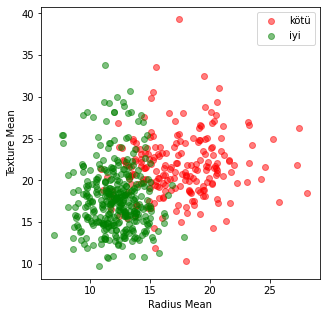

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

M=data[data.diagnosis == 'M']
B=data[data.diagnosis == 'B']

plt.figure(figsize=(5,5))
plt.scatter(M.radius_mean,M.texture_mean,color='red',label='kötü',alpha=0.5)
plt.scatter(B.radius_mean,B.texture_mean,color='green',label='iyi',alpha=0.5)
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend()
plt.show()

- Subplot kullanarak görselleştirme yaptık

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Texture Mean')

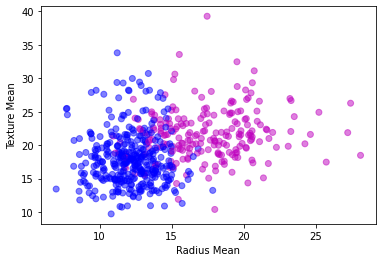

In [ ]:
fig,ax = plt.subplots()

ax.scatter(data['radius_mean'],data['texture_mean'],c=data['diagnosis'],cmap='viridis',alpha=0.5)
ax.set_xlabel('Radius Mean')
ax.set_ylabel('Texture Mean')

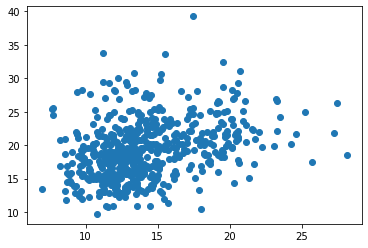

In [ ]:
plt.scatter(data['radius_mean'],data['texture_mean'])

- Kategorik verilerin bulunduğu diagnosis sütununu görselleştirdik.
- Kategorik verilerin sayısını öğrenmiş olduk

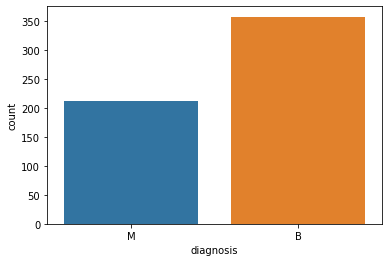

In [ ]:
sns.countplot(x=data['diagnosis'])

- Diagnosis sütununda ki kategorik verilerin radius_mean sütunu ile ilişkisini countplot le görselleştirdik.
- Buradan kötü huylu kanser hücresinin( M ) radius_mean değerleri daha yüksek olduğunu anlıyoruz

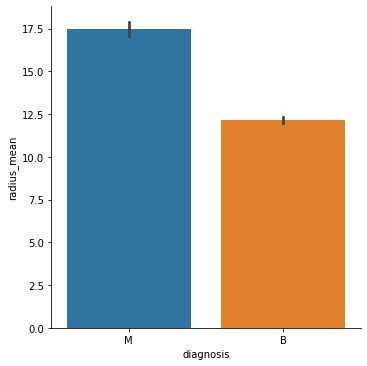

In [ ]:
sns.catplot(x=data.diagnosis,y=data.radius_mean,data=data,kind='bar')

- yukarıdakı grafiği subplot oluşturarak ile görselleştirdik

Text(0, 0.5, 'Radius Mean')

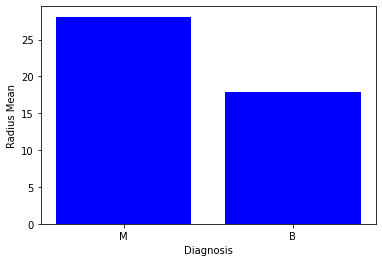

In [ ]:
fig,ax = plt.subplots()

ax.bar(data['diagnosis'],data['radius_mean'],color='b')
ax.set_xlabel('Diagnosis')
ax.set_ylabel('Radius Mean')

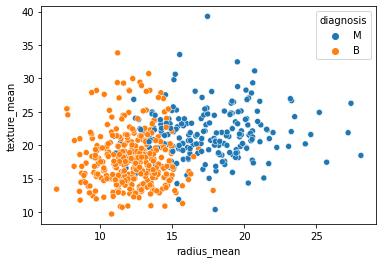

In [ ]:
sns.scatterplot(x=data['radius_mean'],y=data['texture_mean'],hue=data['diagnosis'])

- Diagnosis kategorik veri sütununun radius_mean ve texture_mean de dağılımlarını görselleştrdik

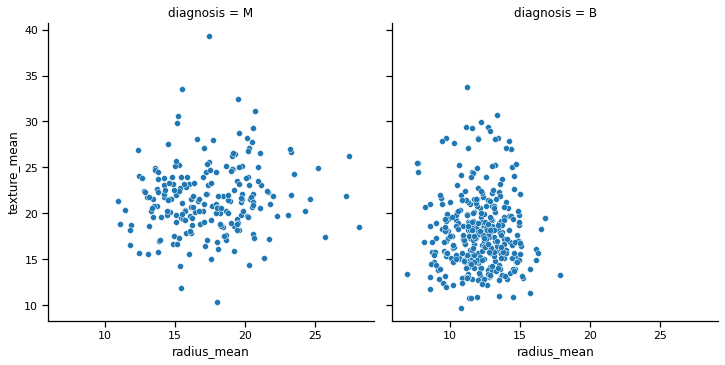

In [ ]:
sns.relplot(x=data.radius_mean,y=data.texture_mean,col=data.diagnosis)
sns.set_context("talk")
plt.show()

- Datamızın korelasyonunu heatmap ile görseleştirdik
- Böylelikle sütunlarımız arasında ki korelasyon ilişkisini daha da iyi görmüş oluyoruz

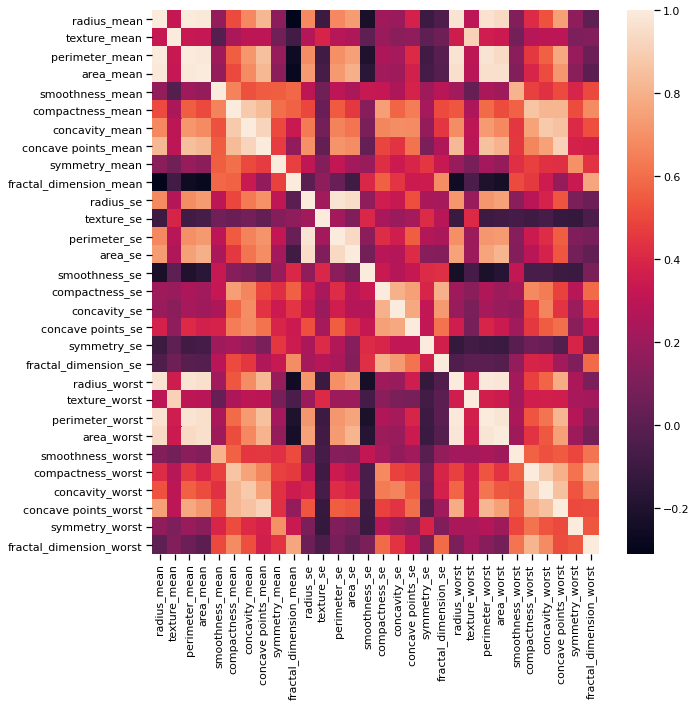

In [ ]:
plt.figure(figsize=(10,10))
correlation = data.corr()
sns.heatmap(correlation,annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 504x504 with 0 Axes>

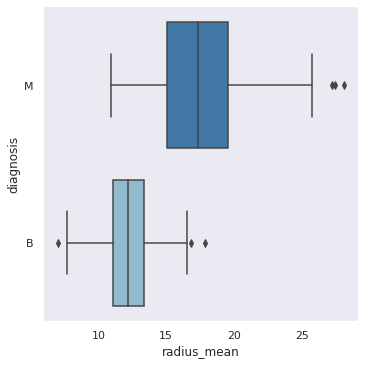

In [ ]:
plt.figure(figsize=(7,7))
sns.set_context("notebook") #yazıların fontunu ayarlar.
sns.set_palette("RdBu_r")  #Markerların rengını ayarlar
sns.set_style("dark")      #ark plan rengini ayarlar
sns.catplot(data.radius_mean,data.diagnosis,data=data,kind='box')

# DECISION TREE

- Kategörik verilerimizin olduğu diagnosis sütununu Label Encoder ile 0 ve 1 lerden oluşan bir sütun haine getiriyoruz

In [7]:
from sklearn.preprocessing import LabelEncoder

la_enc = LabelEncoder()

data.diagnosis = la_enc.fit_transform(data.diagnosis)

In [8]:
data['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


- Biz radius_mean değerlerini tahmin etmeye çlışacağız.Bu yüzden bizim bağımlı değişkenimiz radius_mean olacak.
- O yüzden radius_mean' i datamızdan alıyoruz

In [ ]:
radius_mean = data.iloc[:,1:2]

In [ ]:
radius_mean

,radius_mean
0,17.99
1,20.57
2,19.69
3,11.42
4,20.29
...,...
564,21.56
565,20.13
566,16.60
567,20.60


- Bizim bağımsız değişkenimiz olacak olan datamızdan bağımlı değişkenimiz olan radius_mean sütununu çıkartıyoruz

In [ ]:
data.drop('radius_mean',axis=1,inplace=True)

In [ ]:
data

,diagnosis,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


-Bağımlı ve Bağımsız değişkenlerimiz ile train ve test dataları elde ediyoruz

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data,radius_mean,test_size=0.33,random_state=18)

- Oluşturduğumuz Train ve Test datalarının boyutuna bakıyoruz

In [ ]:
print("x_train shape = " + str(x_train.shape))
print("x_test shape = " + str(x_test.shape))
print("y_train shape = " + str(y_train.shape))
print("y_test shape = " + str(y_test.shape))

x_train shape = (381, 30)
x_test shape = (188, 30)
y_train shape = (381, 1)
y_test shape = (188, 1)


- Decision Tree Regression algoritmasını kullanarak modelimizi fit ediyoruz

In [ ]:
from sklearn.tree import DecisionTreeRegressor

r_dt = DecisionTreeRegressor()

r_dt.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

- x_test datasını kullanarak decision tree algoritması ile predict ederek predicton datası oluşturuyoruz

In [ ]:
y_pred = r_dt.predict(x_test)

- y_test datamızın tipini numpy array yapıyoruz

In [ ]:
y_test=y_test.values

In [ ]:
type(y_test)

numpy.ndarray

- Bizim y_test datamız ile modelimizin prediction yaptığı y_pred datamızınilk 20 verilerini karşılaştırıyoruz

In [ ]:
for i in range(20):
  print("{} = {} ".format(y_test[i],y_pred[i]))

[11.22] = 11.31 
[12.25] = 12.34 
[13.21] = 13.15 
[11.75] = 11.75 
[13.] = 13.34 
[15.75] = 15.7 
[11.41] = 11.52 
[9.268] = 9.173 
[13.77] = 13.85 
[17.05] = 17.02 
[13.51] = 13.4 
[14.34] = 14.48 
[20.57] = 20.64 
[10.57] = 10.51 
[13.87] = 13.74 
[17.57] = 17.47 
[12.27] = 12.34 
[9.405] = 9.436 
[17.99] = 18.05 
[13.44] = 13.49 


# RANDOM FOREST 

- Şimdi de radius_mean değerlerini prediction yapmak için Random Forest Regression algoritmasını kullanıyoruz

In [ ]:
from sklearn.ensemble import RandomForestRegressor

ran_for = RandomForestRegressor(n_estimators=5,random_state=18)

ran_for.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=18, verbose=0, warm_start=False)

- x_test datasını kullanarak Random Forest algoritması ile predict ederek predicton datası oluşturuyoruz

In [ ]:
y_pred_forest = ran_for.predict(x_test)

- y_test ile random forest kullanarak oluşturduğumuz prediction datası olan y_pred_forest ilk 20 verilerini karşılaştırıyoruz

In [ ]:
for i in range(20):
  print("{} = {} ".format(y_test[i],y_pred_forest[i]))

[11.22] = 11.26 
[12.25] = 12.36 
[13.21] = 13.241999999999999 
[11.75] = 11.768 
[13.] = 13.091999999999999 
[15.75] = 15.654000000000002 
[11.41] = 11.517999999999999 
[9.268] = 9.1784 
[13.77] = 13.856 
[17.05] = 17.125999999999998 
[13.51] = 13.351999999999999 
[14.34] = 14.442000000000002 
[20.57] = 20.578000000000003 
[10.57] = 10.533999999999999 
[13.87] = 13.806000000000001 
[17.57] = 17.432000000000002 
[12.27] = 12.356 
[9.405] = 9.4398 
[17.99] = 18.026 
[13.44] = 13.441999999999998 


- y_test ile decision tree modelinin prediction datasını ve random forest modelinin prediction datasını ilk 20 veride karşılaştırdık

In [ ]:
print("y_test - y_pred_dtree - y_pred_forest")
for i in range(20):
  print("{} = {} - {} ".format(y_test[i],y_pred[i],y_pred_forest[i]))

y_test - y_pred_dtree - y_pred_forest
[11.22] = 11.31 - 11.26 
[12.25] = 12.34 - 12.36 
[13.21] = 13.15 - 13.241999999999999 
[11.75] = 11.75 - 11.768 
[13.] = 13.34 - 13.091999999999999 
[15.75] = 15.7 - 15.654000000000002 
[11.41] = 11.52 - 11.517999999999999 
[9.268] = 9.173 - 9.1784 
[13.77] = 13.85 - 13.856 
[17.05] = 17.02 - 17.125999999999998 
[13.51] = 13.4 - 13.351999999999999 
[14.34] = 14.48 - 14.442000000000002 
[20.57] = 20.64 - 20.578000000000003 
[10.57] = 10.51 - 10.533999999999999 
[13.87] = 13.74 - 13.806000000000001 
[17.57] = 17.47 - 17.432000000000002 
[12.27] = 12.34 - 12.356 
[9.405] = 9.436 - 9.4398 
[17.99] = 18.05 - 18.026 
[13.44] = 13.49 - 13.441999999999998 


- Decision Tree ve Random Forest ile oluşturduğumuz modellerimizin r2 score değerlerine baktık

In [ ]:
from sklearn.metrics import r2_score

r2_dtree = r2_score(y_test,y_pred)

r2_forest = r2_score(y_test,y_pred_forest)

In [ ]:
print("Decision Tree = " + str(r2_dtree))
print("Forest = " + str(r2_forest))

Decision Tree = 0.9974554015342139
Forest = 0.9964357343940184


- Decision Tree ve Random Forest ile oluşturduğumuz modellerimizin mean_squared_error değerlerine baktık

In [ ]:
from sklearn.metrics import  mean_squared_error 

mse_dtree = mean_squared_error(y_test,y_pred)

mse_forest = mean_squared_error(y_test,y_pred_forest)

In [ ]:
print("Decision Tree MSE = " + str(mse_dtree))
print("Forest MSE = " + str(mse_forest))

Decision Tree MSE = 0.028223739361702166
Forest MSE = 0.03953350787234043


- Decision Tree ve Random Forest ile oluşturduğumuz modellerimizin Root Mean Squared Error değerlerine baktık

In [ ]:
import numpy as np

print("Decision Tree RMSE = " , np.sqrt(mse_dtree))
print("Forest RMSE = " , np.sqrt(mse_forest))

Decision Tree RMSE =  0.1679992242889894
Forest RMSE =  0.19883034947497435


- Root Mean Squared Error değerini değerlendirmek için bağımlı değişkenin standart sapmasını alıyoruz. 
- Rmse değeri, bağımlı değişkenin standart sapmasından küçük ise modelin iyi olduğunu söyleyebiliriz

In [ ]:
print(np.std(radius_mean))

radius_mean    3.520951
dtype: float64


# K-NEAREST NEIGHBORS 

- Diagnosis kategorik verisini sınıflandıracağız.
- Daha önce bizim bağımlı değişkenimiz olan radius_mean sütununu datamıza ekliyoruz

In [ ]:
data = pd.concat([data,radius_mean],axis=1)

- Bağımlı değişkenimiz olacak olan diagnosis sütunun datamızdan alıyoruz

In [10]:
diagnosis = data.iloc[:,0:1]

In [11]:
diagnosis

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


- Diagnosis sütununu datamızdan siliyoruz

In [12]:
data = data.drop(diagnosis,axis=1)

In [13]:
data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


- Bağımlı değişkenimiz diagnosis sütunu ile bağımsız değişkenimiz olan datamızı kullanarak train ve test dataları elde ediyoruz

In [15]:
from sklearn.model_selection import train_test_split

x_train2,x_test2,y_train2,y_test2 = train_test_split(data,diagnosis,test_size=0.33,random_state=18)

- Oluşturduğumuz train ve test datalarımızın boyutlarına baktık

In [16]:
print("x_train2 = "+ str(x_train2.shape))
print("x_test2 = " + str(x_test2.shape))   
print("y_train2 = "+ str(y_train2.shape))
print("y_test2 = " + str(y_test2.shape))   

x_train2 = (381, 30)
x_test2 = (188, 30)
y_train2 = (381, 1)
y_test2 = (188, 1)


- Diagnosis kategorik verilerimizi sınıflandırma yaparken KNN algoritmasını kullacanağız

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski')

knn.fit(x_train2,y_train2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

- x_test2 datamızı KNN algoritmamız ile predict ederek prediction datası elde ediyoruz 

In [18]:
y_pred_knn = knn.predict(x_test2)

- Modelimizin sınıflandırma başarını görmek için confusion_matrix elde ediyoruz

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test2,y_pred_knn)

In [20]:
cm

array([[108,   3],
       [ 14,  63]])

- Confusion_matrix'mizi Seaborn heatmap ile görselleştiriyoruz

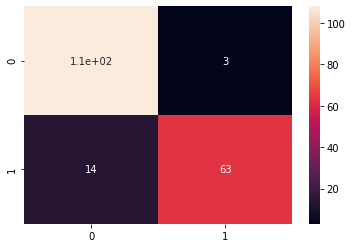

In [ ]:
import seaborn as sns 

sns.heatmap(cm,annot = True)

- Modelimizin sınıflandırma tahmin başarısını görmek için accuracy_score değerine bakıyoruz

In [ ]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_pred_knn,y_test2)

In [ ]:
acc_score

0.9095744680851063

- Doğru sınıflandırma yaptıklarımızın toplam sayısını alabilmek için normalize parametresine " False " yazmamız yeterli

In [ ]:
acc_score_sum = accuracy_score(y_pred_knn,y_test2,normalize=False)

- Böyelikle biz 188 tane test verimizin 171 tanesini doğru sınıflandırma yapmış modelimiz

In [ ]:
acc_score_sum

171

- Modelimizin başarısını değerlendirirken sadece accuracy score'una bakmak bizi yanıltabilir.Yani accuracy değeri tek başına yeterli olmaz
- F1 score değeri sayesinde eşit dağılmayan veri kümelerinde hatalı model kullanmaktan kaçınmaktır.

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_pred_knn,y_test2,average='binary',pos_label=0)

In [ ]:
f1

0.9270386266094421

- Yukarıda f1 score bakarken sklearn içerisinde f1_score kullandık
- Şimdi ise f1 score formülünü kullanarak biz hesaplama yapacağız

- Precision (Kesinlik) = TP / TP + FP

- Recall (Duyarlılık) = TP / TP + FN

- F1 score = 2 * (precision * recall) / (precision + recall)

In [ ]:
precision = np.divide(108,111)

In [ ]:
recall = np.divide(108,122)

In [ ]:
 f1_2= 2 * (precision * recall) / (precision + recall)

In [ ]:
f1_2

0.9270386266094421

- f1 score değeri , f1_score( ) içerisindeki average parametresine vermiş olduğumuz değere göre değişiklik gösterebilir.Çünkü verilen değere göre hesaplama yapıyor.
- Defaut olarak " binary " değerini alır.


- Classification Report ile precision , recall , f1-score ve accuracy değerlerini beraber görebiliriz

In [21]:
from sklearn.metrics import classification_report

cl_report = classification_report(y_test2,y_pred_knn)

In [23]:
print(cl_report)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       111
           1       0.95      0.82      0.88        77

    accuracy                           0.91       188
   macro avg       0.92      0.90      0.90       188
weighted avg       0.91      0.91      0.91       188

